# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;"> Online_Retail </p>
​
<img src="https://akm-img-a-in.tosshub.com/businesstoday/images/story/201904/online-shopping-660_041819095912.jpg?size=948:533">
​
​
<!-- <img src="https://cdn.dribbble.com/users/223902/screenshots/1772418/dribbble.jpg?compress=1&resize=800x600&vertical=top">
​
<img src="https://cdn.dribbble.com/users/1209618/screenshots/3000481/media/2c83cb04193be0215eb94f62429b1a70.gif"> -->
​
<b> Context </b>
​
Dataset contains following features:


1. `InvoiceNo`: A unique identifier for each invoice or order.
2. `StockCode`: A code that represents the stock or product.
3. `Description`: A description of the product.
4. `Quantity`: The quantity of the product ordered in that particular invoice.
5. `InvoiceDate`: The date and time when the invoice was created.
6. `UnitPrice`: The price of one unit of the product.
7. `CustomerID`: The unique identifier for the customer who placed the order.
8. `Country`: The country where the customer is located.



<a id="1"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

<a id="2"></a>

<p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [2]:
# Load the Excel file into a DataFrame
data = pd.read_excel("/kaggle/input/online-retail/Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="3"></a>

<p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;"> Data Overview</p>

In [3]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,541899,541900,541901,541902,541903,541904,541905,541906,541907,541908
InvoiceNo,536365,536365,536365,536365,536365,536365,536365,536366,536366,536367,...,581587,581587,581587,581587,581587,581587,581587,581587,581587,581587
StockCode,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879,...,22726,22730,22367,22629,23256,22613,22899,23254,23255,22138
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,...,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,CHILDRENS APRON SPACEBOY DESIGN,SPACEBOY LUNCH BOX,CHILDRENS CUTLERY SPACEBOY,PACK OF 20 SPACEBOY NAPKINS,CHILDREN'S APRON DOLLY GIRL,CHILDRENS CUTLERY DOLLY GIRL,CHILDRENS CUTLERY CIRCUS PARADE,BAKING SET 9 PIECE RETROSPOT
Quantity,6,6,8,6,6,2,6,6,6,32,...,4,4,8,12,4,12,6,4,4,3
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:28:00,2010-12-01 08:28:00,2010-12-01 08:34:00,...,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00,2011-12-09 12:50:00
UnitPrice,2.55,3.39,2.75,3.39,3.39,7.65,4.25,1.85,1.85,1.69,...,3.75,3.75,1.95,1.95,4.15,0.85,2.1,4.15,4.15,4.95
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,13047.0,...,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0,12680.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,...,France,France,France,France,France,France,France,France,France,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [6]:
data.shape

(541909, 8)

In [7]:
data.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303



<a id="4"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">📊 EDA</p>
​

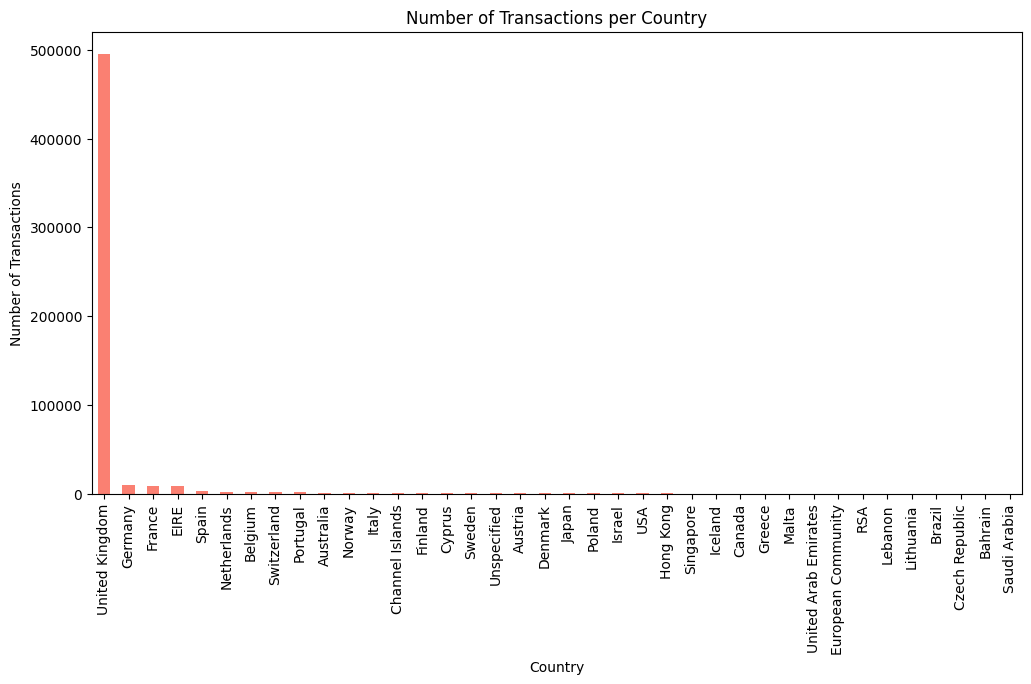

In [10]:
# Count the number of transactions per country
transactions_per_country = data['Country'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
transactions_per_country.plot(kind='bar', color='salmon')
plt.title('Number of Transactions per Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


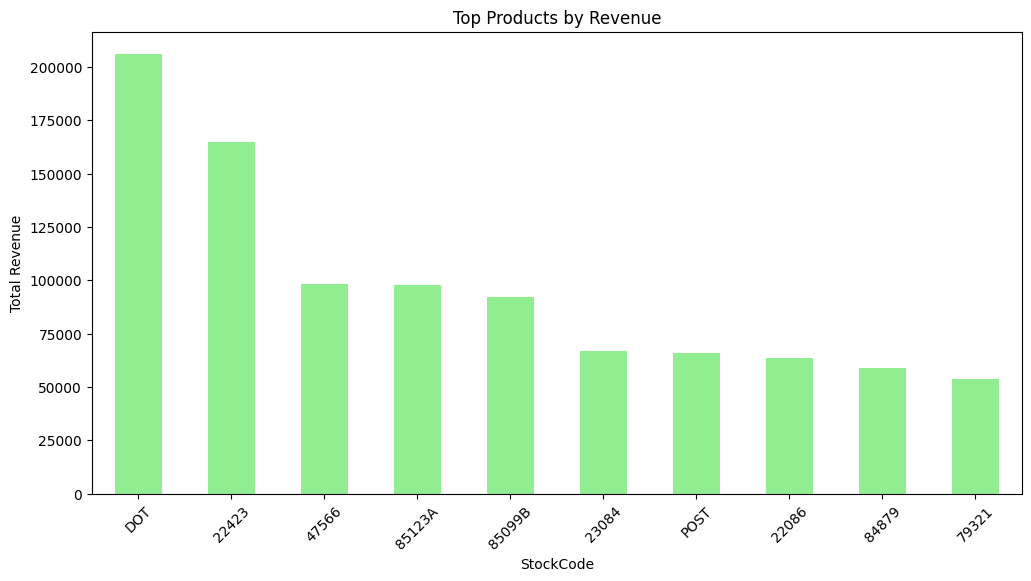

In [11]:
# Calculate revenue (quantity * unit price) and group by StockCode
data['Revenue'] = data['Quantity'] * data['UnitPrice']
top_products_by_revenue = data.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_products_by_revenue.plot(kind='bar', color='lightgreen')
plt.title('Top Products by Revenue')
plt.xlabel('StockCode')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



<a id="4"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">Preprocessing </p>

In [12]:
data = data[data['CustomerID'].notnull()]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Revenue      406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [14]:
data['InvoiceDay'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

In [15]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [16]:
dt.timedelta(1)

datetime.timedelta(days=1)

In [17]:
data['TotalSum'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDay,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,20.34


In [19]:
# Define the reference date as the current date
pin_date = dt.datetime.now().date()


In [20]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDay': lambda x: (pin_date - x.max().date()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'
})
rfm


,InvoiceDay,InvoiceNo,TotalSum
CustomerID,,,
12346.0,4620,2,0.00
12347.0,4297,182,4310.00
12348.0,4370,31,1797.24
12349.0,4313,73,1757.55
12350.0,4605,17,334.40
...,...,...,...
18280.0,4572,10,180.60
18281.0,4475,7,80.82
18282.0,4302,13,176.60


In [21]:
data[data['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDay,TotalSum
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01-18,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,2011-01-18,-77183.6


In [22]:
rfm.rename(columns= {
    'InvoiceDay': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'Monetary'
}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,4620,2,0.00
12347.0,4297,182,4310.00
12348.0,4370,31,1797.24
12349.0,4313,73,1757.55
12350.0,4605,17,334.40
...,...,...,...
18280.0,4572,10,180.60
18281.0,4475,7,80.82
18282.0,4302,13,176.60


In [23]:
r_labels = range(4, 0, -1) #[4, 3, 2, 1]
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_labels = range(1, 5) # [1, 2, 3, 4]
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [24]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,4620,2,0.00,1,1,1
12347.0,4297,182,4310.00,4,4,4
12348.0,4370,31,1797.24,2,2,4
12349.0,4313,73,1757.55,3,3,4
12350.0,4605,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,4572,10,180.60,1,1,1
18281.0,4475,7,80.82,1,1,1
18282.0,4302,13,176.60,4,1,1


<a id="8"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:#black;font-size:150%;text-align:center;border-radius:10px 10px;">💡 MODELS</p>

# 1️⃣ KMeans 🌲

In [25]:
X = rfm[['R', 'F', 'M']]
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300)
kmeans.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [26]:
kmeans.labels_

array([1, 5, 6, ..., 2, 5, 3], dtype=int32)

In [27]:
rfm['kmeans_cluster'] = kmeans.labels_

In [28]:
rfm

,Recency,Frequency,Monetary,R,F,M,kmeans_cluster
CustomerID,,,,,,,
12346.0,4620,2,0.00,1,1,1,1
12347.0,4297,182,4310.00,4,4,4,5
12348.0,4370,31,1797.24,2,2,4,6
12349.0,4313,73,1757.55,3,3,4,3
12350.0,4605,17,334.40,1,1,2,1
...,...,...,...,...,...,...,...
18280.0,4572,10,180.60,1,1,1,1
18281.0,4475,7,80.82,1,1,1,1
18282.0,4302,13,176.60,4,1,1,2


In [ ]:
rfm[rfm['kmeans_cluster'] == 4]

In [36]:
#Generate customized offers by leveraging the most frequently purchased products within each customer cluster.
recommended_products = {}
for cluster in range(10):
    cluster_data = rfm[rfm["kmeans_cluster"] == cluster]
    max_purchase_product = data[data["CustomerID"].isin(cluster_data.index)].groupby(["Description"])["Quantity"].sum().idxmax()
    recommended_products[cluster] = max_purchase_product
    print(recommended_products)

{0: 'RABBIT NIGHT LIGHT'}
{0: 'RABBIT NIGHT LIGHT', 1: 'VICTORIAN GLASS HANGING T-LIGHT'}
{0: 'RABBIT NIGHT LIGHT', 1: 'VICTORIAN GLASS HANGING T-LIGHT', 2: 'ASSTD DESIGN 3D PAPER STICKERS'}
{0: 'RABBIT NIGHT LIGHT', 1: 'VICTORIAN GLASS HANGING T-LIGHT', 2: 'ASSTD DESIGN 3D PAPER STICKERS', 3: 'BROCADE RING PURSE '}
{0: 'RABBIT NIGHT LIGHT', 1: 'VICTORIAN GLASS HANGING T-LIGHT', 2: 'ASSTD DESIGN 3D PAPER STICKERS', 3: 'BROCADE RING PURSE ', 4: 'ASSORTED INCENSE PACK'}
{0: 'RABBIT NIGHT LIGHT', 1: 'VICTORIAN GLASS HANGING T-LIGHT', 2: 'ASSTD DESIGN 3D PAPER STICKERS', 3: 'BROCADE RING PURSE ', 4: 'ASSORTED INCENSE PACK', 5: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'}
{0: 'RABBIT NIGHT LIGHT', 1: 'VICTORIAN GLASS HANGING T-LIGHT', 2: 'ASSTD DESIGN 3D PAPER STICKERS', 3: 'BROCADE RING PURSE ', 4: 'ASSORTED INCENSE PACK', 5: 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 6: 'SMALL CHINESE STYLE SCISSOR'}
{0: 'RABBIT NIGHT LIGHT', 1: 'VICTORIAN GLASS HANGING T-LIGHT', 2: 'ASSTD DESIGN 3D PAPER STICKERS', 3:

In [37]:
# Show offers to users
pd.DataFrame({
    "Cluster": list(recommended_products.keys()),
    "RecommendedProduct": list(recommended_products.values())
}).style.background_gradient(cmap="magma")

,Cluster,RecommendedProduct
0,0,RABBIT NIGHT LIGHT
1,1,VICTORIAN GLASS HANGING T-LIGHT
2,2,ASSTD DESIGN 3D PAPER STICKERS
3,3,BROCADE RING PURSE
4,4,ASSORTED INCENSE PACK
5,5,WORLD WAR 2 GLIDERS ASSTD DESIGNS
6,6,SMALL CHINESE STYLE SCISSOR
7,7,ESSENTIAL BALM 3.5g TIN IN ENVELOPE
8,8,WORLD WAR 2 GLIDERS ASSTD DESIGNS
9,9,GIRLS ALPHABET IRON ON PATCHES


In [71]:


# Generate proposals for each client
customer_recommendations = {}

for cluster in range(10):
    # Selection of customers who belong to the respective cluster
    cluster_data = rfm[rfm['kmeans_cluster'] == cluster]

    # Find the product with the most purchases in this cluster
    max_purchase_product = data[data['CustomerID'].isin(cluster_data.index)].groupby('Description')['Quantity'].sum().idxmax()

    # Find customers who have not purchased this product
    customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]

    # Add the product to the offer list for each customer
    for customer_id in customers_without_max_product['CustomerID'].unique():
        if customer_id not in customer_recommendations:
            # If the customer is getting the recommended products for the first time, make the offer list empty (empty list).
            customer_recommendations[customer_id] = []

        # Offer the customer the most purchased products
        customer_recommendations[customer_id].append(max_purchase_product)
#for customer_id, product in customer_recommendations.items():
   # print(f"customer: {customer_id}, recommended_products: {product}")



pd.set_option('display.max_rows', 1000000)
pd.DataFrame({
    'CustomerID': list(customer_recommendations.keys()),
    'RecommendedProducts': [', '.join(recommended_products) for recommended_products in customer_recommendations.values()],  
}).style.background_gradient(cmap="magma")

/tmp/ipykernel_33/608288816.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
/tmp/ipykernel_33/608288816.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
/tmp/ipykernel_33/608288816.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
/tmp/ipykernel_33/608288816.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]
/tmp/ipykernel_33/608288816.py:12: U

,CustomerID,RecommendedProducts
0,15756.000000,RABBIT NIGHT LIGHT
1,13418.000000,RABBIT NIGHT LIGHT
2,17677.000000,RABBIT NIGHT LIGHT
3,15521.000000,RABBIT NIGHT LIGHT
4,14056.000000,"RABBIT NIGHT LIGHT, VICTORIAN GLASS HANGING T-LIGHT"
5,13662.000000,RABBIT NIGHT LIGHT
6,12649.000000,RABBIT NIGHT LIGHT
7,12731.000000,RABBIT NIGHT LIGHT
8,12621.000000,"RABBIT NIGHT LIGHT, BROCADE RING PURSE"
9,14646.000000,"RABBIT NIGHT LIGHT, VICTORIAN GLASS HANGING T-LIGHT"
